In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/ASUS/Downloads/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clusters
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.910000
std,57.879185,13.969007,26.264721,25.823522,1.326915
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000


In [5]:
# choosing two dimensions for easy plotting

x = df.iloc[:,3:5].values

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

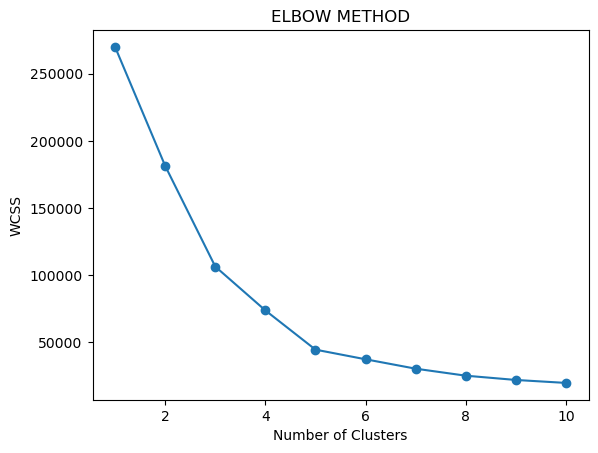

In [6]:
#using Elbow method

from sklearn.cluster import KMeans

WCSS = []

#within cluster sum of squares

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++",max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,11),WCSS, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("ELBOW METHOD")
plt.show()

In [7]:
# here, no of clusters must be 5

In [8]:
# apply Kmeans algo to dataset

kmeans = KMeans(n_clusters = 5, init = "k-means++")
y_kmeans = kmeans.fit_predict(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


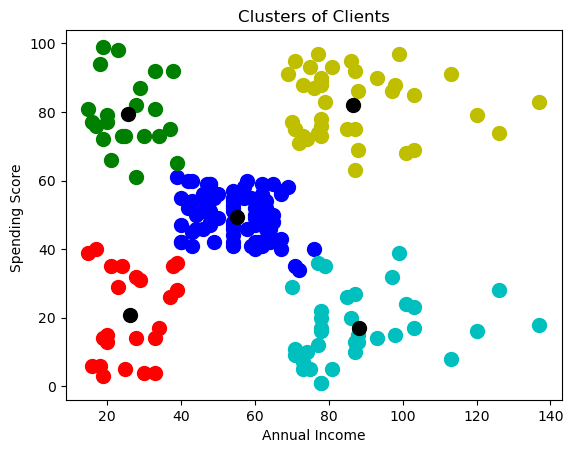

In [9]:
# visualize the clusters

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s = 100, c = 'r',label = "CLUSTER 1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s = 100, c = 'blue',label = "CLUSTER 2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s = 100, c = 'g',label = "CLUSTER 3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s = 100, c = 'y',label = "CLUSTER 4")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s = 100, c = 'c',label = "CLUSTER 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100, c = 'black',label = "CENTROIDS")

plt.xlabel("Annual Income")
plt.ylabel("Spending Score ")
plt.title("Clusters of Clients")
plt.show()

In [22]:
df["Clusters"] = kmeans.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,4
197,198,Male,32,126,74,3
198,199,Male,32,137,18,4


In [30]:
# new data to predict

data = [[140,88]]

ND = kmeans.predict(data)
ND

array([3])